# Juggling with Data - with APACHE SPARK

<br /><p>
This Notebook captures the essence of <em><strong>INTEROPERABILITY</strong></em> with different types of workloads using Hadoop style  map-reduce to SQL to Dataframe to visualization - <strong>all. under. one. umbrella.</strong>
<p>This IPython Notebook (jupyter) is configured with SPARK 1.3 and started with <i>--profile=pyspark</i> option </p>
</p>
<br />
Hope this helps,<p />
<b>Arindam Paul</b> <p />
<b> Twitter </b>: @parindam
<b>Linkedin</b>: https://in.linkedin.com/pub/arindam-paul/1b/4b8/a26

In [1]:
from IPython.display import YouTubeVideo, Image

<br /><p>
Following image shows the vision of <em><b>SPARK compute framework</b></em> and examples in this notebook does not cover streaming, graph and MLLIB. Hope to cover this in my next notebook.
SparkR is alpha and slated to be released in June as part of Spark-1.4.
</p>
<br />

In [2]:
Image(url='http://image.slidesharecdn.com/2015-02-17dataframes-150218163844-conversion-gate01/95/introducing-dataframes-in-spark-for-large-scale-data-science-37-638.jpg?cb=1425946701')

In [3]:
Image(url='http://blog.optimalbi.com/wp-content/uploads/2014/06/big-data-funny-meme.jpg')

In [4]:
YouTubeVideo('lhkzgjOKeLs')

#1. get SparkContext

In [5]:
import os
from pyspark import SparkContext

# print SPARK HOME
spark_home = os.environ.get('SPARK_HOME', None)
print (spark_home)

# Get an handle of SparkContext
sc = SparkContext(appName="More than Word Count")


/Users/arindampaul/Documents/SPARK/spark1.3/spark-1.3.0


#2. lets get some data and some utility

In [6]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from nltk.corpus import gutenberg
print gutenberg.fileids()

#stopwords = ["a","able","about","across","after","all","almost","also","am","among","an","and","any","are","as","at","be","because","been","but","by","can","cannot","could","dear","did","do","does","either","else","ever","every","for","from","get","got","had","has","have","he","her","hers","him","his","how","however","i","if","in","into","is","it","its","just","least","let","like","likely","may","me","might","most","must","my","neither","no","nor","not","of","off","often","on","only","or","other","our","own","rather","said","say","says","she","should","since","so","some","than","that","the","their","them","then","there","these","they","this","tis","to","too","twas","us","wants","was","we","were","what","when","where","which","while","who","whom","why","will","with","would","yet","you","your"]

stopwords = set(stopwords)

txt = gutenberg.words('burgess-busterbrown.txt')

len(txt)

[u'austen-emma.txt', u'austen-persuasion.txt', u'austen-sense.txt', u'bible-kjv.txt', u'blake-poems.txt', u'bryant-stories.txt', u'burgess-busterbrown.txt', u'carroll-alice.txt', u'chesterton-ball.txt', u'chesterton-brown.txt', u'chesterton-thursday.txt', u'edgeworth-parents.txt', u'melville-moby_dick.txt', u'milton-paradise.txt', u'shakespeare-caesar.txt', u'shakespeare-hamlet.txt', u'shakespeare-macbeth.txt', u'whitman-leaves.txt']


18963

# Note: 
When you have a big file, load it as 
<p><em>text_file = sc.textFile("/Users/arindampaul/Downloads/gitanjali.txt")</em></p>
<p>and not the way shown above, <em>(as len(txt))</em>, it will throw you OOM</p>
<h2>3. Welcome to BIG DATA</h2>

In [7]:
# Bigger files to be counted as follows
text_file = sc.parallelize(txt)

totalCounts = text_file.flatMap(lambda x: x.split(' ')) \
                  .map(lambda x: ("totCounts", 1)) \
                  .reduceByKey(lambda x, y: x+y).collect()
        
print ("Total Counts:", totalCounts)#.pprint())

('Total Counts:', [('totCounts', 18963)])


#4. Word frequency - basic

In [8]:


counts = text_file.flatMap(lambda x: x.split(' ')) \
                  .map(lambda x: (x, 1)) \
                  .reduceByKey(lambda x,y: x+y)

counts.take(20)

[(u'replied', 5),
 (u'neighbors', 6),
 (u'willingly', 1),
 (u'whether', 2),
 (u'being', 9),
 (u'sound', 5),
 (u'dear', 3),
 (u'Stickytoes', 3),
 (u'everybody', 20),
 (u'discovered', 2),
 (u'catch', 15),
 (u'Tit', 1),
 (u'tiptoed', 1),
 (u'happily', 1),
 (u'believed', 1),
 (u'lonesome', 2),
 (u'saucy', 1),
 (u'preventing', 1),
 (u'helping', 1),
 (u'thinking', 3)]

#5. Word frequency - improved

In [9]:


counts = text_file.flatMap(lambda x: x.split(' ')) \
                  .filter(lambda x: len(x) > 0) \
                  .filter(lambda x: x.lower() not in stopwords) \
                  .map(lambda x: (x.lower(), 1)) \
                  .reduceByKey(lambda x,y: x+y)
counts.take(20)

[(u'replied', 5),
 (u'neighbors', 6),
 (u'willingly', 1),
 (u'scooped', 2),
 (u'dear', 3),
 (u'everybody', 22),
 (u'discovered', 2),
 (u'catch', 15),
 (u'helped', 4),
 (u'go', 24),
 (u'happily', 1),
 (u'believed', 1),
 (u'lonesome', 2),
 (u'saucy', 1),
 (u'preventing', 1),
 (u'helping', 1),
 (u'thinking', 3),
 (u'somewhere', 2),
 (u'remembered', 2),
 (u'better', 10)]

#6. Top 50 Words

In [10]:
sortedOp = counts.map(lambda (x,y): (y,x)).sortByKey(0).map(lambda (i,j): (j, i))
sortedOp.take(50)

[(u'.', 823),
 (u',', 822),
 (u"'", 401),
 (u'buster', 229),
 (u'little', 207),
 (u'"', 166),
 (u'bear', 152),
 (u'joe', 112),
 (u'brown', 102),
 (u'one', 102),
 (u'farmer', 100),
 (u'boy', 95),
 (u'green', 87),
 (u'see', 74),
 (u'-', 74),
 (u'!', 69),
 (u'forest', 66),
 (u'didn', 57),
 (u'could', 56),
 (u',"', 56),
 (u'!"', 52),
 (u'blacky', 52),
 (u'otter', 51),
 (u'great', 50),
 (u'said', 50),
 (u'big', 49),
 (u'know', 48),
 (u'time', 48),
 (u'pool', 47),
 (u'would', 46),
 (u'fish', 44),
 (u'berries', 44),
 (u'way', 44),
 (u'sammy', 42),
 (u'old', 42),
 (u'."', 41),
 (u'away', 40),
 (u'afraid', 40),
 (u'pail', 40),
 (u'looked', 39),
 (u'billy', 39),
 (u'trout', 37),
 (u'right', 36),
 (u'tree', 36),
 (u'laughing', 34),
 (u'get', 34),
 (u'brook', 32),
 (u'thing', 31),
 (u'couldn', 29),
 (u'chatterer', 29)]

#7. SQL - get SQLContext

In [11]:
from pyspark.sql import SQLContext, Row
sqlContext = SQLContext(sc)

#8. Convert each line to a Row
The keys of this list define the column names of the table, and the types are inferred by looking at the first row.

In [12]:
wordRDD = sortedOp.map(lambda w: Row(word=w[0], counts=int(w[1])))

wordRDD.first()


Row(counts=823, word=u'.')

what is wordRDD ?

In [13]:
wordRDD

PythonRDD[30] at RDD at PythonRDD.scala:42

#9. Infer the schema, and register the DataFrame as a table.

<em>schemaWord is a DataFrame</em>

In [14]:

schemaWord = sqlContext.inferSchema(wordRDD)

#10. Search in the Dataframe

In [15]:
schemaWord.filter(schemaWord.word=="water").show()

counts word 
13     water


#11. Dataframe simplifies things

In [16]:
Image(url='http://image.slidesharecdn.com/2015-02-17dataframes-150218163844-conversion-gate01/95/introducing-dataframes-in-spark-for-large-scale-data-science-8-638.jpg?cb=1425946701')

#12. And improves performance

In [17]:
Image(url='http://image.slidesharecdn.com/2015-02-17dataframes-150218163844-conversion-gate01/95/introducing-dataframes-in-spark-for-large-scale-data-science-10-638.jpg?cb=1425946701')

#13. Use SQL

In [18]:
schemaWord.registerTempTable("wordcount")

searchName = sqlContext.sql("SELECT word,counts FROM wordcount WHERE word like 'w%'")

searchName.show()

word     counts
would    46    
way      44    
went     23    
wasn     16    
water    13    
want     12    
wouldn   11    
wanted   9     
without  9     
watching 9     
word     8     
worse    8     
watch    7     
well     7     
wonder   7     
wrong    6     
whole    6     
waited   6     
world    5     
watched  5     


#14. Visualize the Data

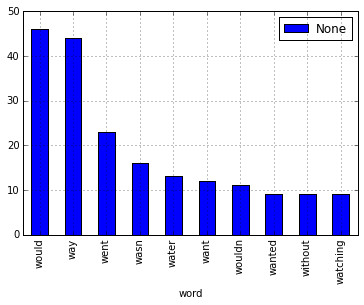

In [19]:
%matplotlib inline

searchName.toPandas()[:10].plot(kind="bar", x="word", y="counts")

#15. Save it when done

In [20]:
#searchName.saveAsParquetFile("w-words-burgess-busterbrown.parquet")


In [21]:
Image(url='http://image.slidesharecdn.com/2015-02-17dataframes-150218163844-conversion-gate01/95/introducing-dataframes-in-spark-for-large-scale-data-science-33-638.jpg?cb=1425946701')

#16. take another text file

In [22]:
moby_text_file = sc.parallelize(gutenberg.words('melville-moby_dick.txt'))

moby_words = moby_text_file.flatMap(lambda x: x.split(' ')) \
                  .filter(lambda x: len(x) > 0) \
                  .filter(lambda x: x.lower() not in stopwords) \
                  .map(lambda x: (x.lower(), 1)) \
                  .reduceByKey(lambda x,y: x+y) \
                  .map(lambda (x,y): (y,x)).sortByKey(0).map(lambda (i,j): (j, i)) \
                  .map(lambda w: Row(word=w[0], counts=int(w[1])))
                    
words_moby_DF = sqlContext.inferSchema(moby_words)               
words_moby_DF.filter(words_moby_DF.word=="water").show()

counts word 
190    water


#17. Similar operation as above

In [23]:

w_words_moby_DF = words_moby_DF.filter((words_moby_DF.word).startswith('w'))

#w_words_moby_DF.saveAsParquetFile("w-words-moby-dick.parquet")

#joined_table = w_words_moby_DF.join(searchName, searchName.word == w_words_moby_DF.word)
#joined_table.printSchema()

w_words_moby_DF.take(10)

[Row(counts=1226, word=u'whale'),
 Row(counts=432, word=u'would'),
 Row(counts=281, word=u'white'),
 Row(counts=271, word=u'way'),
 Row(counts=268, word=u'whales'),
 Row(counts=230, word=u'well'),
 Row(counts=190, word=u'water'),
 Row(counts=176, word=u'world'),
 Row(counts=156, word=u'without'),
 Row(counts=137, word=u'whole')]

#18. Finally ... <em>JOIN</em>

In [24]:
parquet_load_moby = sqlContext.parquetFile("w-words-moby-dick.parquet")
joined_table = parquet_load_moby.join(searchName, searchName.word == parquet_load_moby.word)
        
joined_table.printSchema()

root
 |-- counts: long (nullable = true)
 |-- word: string (nullable = true)
 |-- word: string (nullable = true)
 |-- counts: long (nullable = true)



#19. Name the columns appropriately

In [25]:
joined_schema = joined_table.map(lambda w: Row(moby=w[1], moby_count=int(w[0]), burgess=w[2], burgess_count=int(w[3])))
joined_schema

PythonRDD[90] at RDD at PythonRDD.scala:42

In [26]:
joined_schema.count()

69

#20. display time

In [27]:
joined_schema.take(69)

[Row(burgess=u'would', burgess_count=46, moby=u'would', moby_count=432),
 Row(burgess=u'way', burgess_count=44, moby=u'way', moby_count=271),
 Row(burgess=u'went', burgess_count=23, moby=u'went', moby_count=97),
 Row(burgess=u'wasn', burgess_count=16, moby=u'wasn', moby_count=5),
 Row(burgess=u'water', burgess_count=13, moby=u'water', moby_count=190),
 Row(burgess=u'want', burgess_count=12, moby=u'want', moby_count=33),
 Row(burgess=u'wouldn', burgess_count=11, moby=u'wouldn', moby_count=8),
 Row(burgess=u'wanted', burgess_count=9, moby=u'wanted', moby_count=9),
 Row(burgess=u'without', burgess_count=9, moby=u'without', moby_count=156),
 Row(burgess=u'watching', burgess_count=9, moby=u'watching', moby_count=16),
 Row(burgess=u'word', burgess_count=8, moby=u'word', moby_count=76),
 Row(burgess=u'worse', burgess_count=8, moby=u'worse', moby_count=21),
 Row(burgess=u'watch', burgess_count=7, moby=u'watch', moby_count=58),
 Row(burgess=u'well', burgess_count=7, moby=u'well', moby_count=230

In [28]:
Image(url='http://image.slidesharecdn.com/2015-02-17dataframes-150218163844-conversion-gate01/95/introducing-dataframes-in-spark-for-large-scale-data-science-30-638.jpg?cb=1425946701')